# Peer-graded Assignment: Описательный анализ данных

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 1\. Загрузка данных

In [3]:
X = pd.read_csv('orange_small_churn_data.txt')
X.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN


In [4]:
X.shape

(40000, 230)

In [5]:
real_features = X.columns[:190]
categ_features = X.columns[-40:]

In [6]:
y = pd.read_csv('orange_small_churn_labels.txt', names=['churn'])
y.head()

,churn
0,-1
1,-1
2,-1
3,1
4,-1


Выведем статистики вещественных признаков

In [7]:
X[real_features].describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var181,Var182,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190
count,570.000000,1006.000000,1005.000000,1275.000000,1.165000e+03,35565.000000,35560.000000,0.0,570.000000,1.165000e+03,...,35984.000000,1.275000e+03,1.006000e+03,1006.000000,0.0,570.000000,570.00000,1006.000000,16785.000000,266.000000
mean,11.003509,0.004970,429.328358,0.148235,2.490555e+05,1319.915394,6.792126,NaN,47.487719,3.813466e+05,...,0.610633,1.401428e+06,8.067657e+04,7.419483,NaN,3.515789,16.05614,165.108310,270.585523,22637.159019
std,34.952792,0.157642,4470.405915,1.396054,6.762021e+05,2609.955770,6.287285,NaN,147.137816,9.353348e+05,...,2.492228,2.269264e+06,2.141650e+05,34.642351,NaN,9.412473,54.96505,113.400173,86.723561,30843.320634
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN,0.000000,0.00000,-6.420000,6.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN,0.000000,0.00000,19.380000,204.000000,2419.965000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,854.000000,7.000000,NaN,20.000000,0.000000e+00,...,0.000000,1.084140e+05,0.000000e+00,0.000000,NaN,0.000000,4.00000,196.410000,270.000000,12612.240000
75%,16.000000,0.000000,0.000000,0.000000,1.172150e+05,1435.000000,7.000000,NaN,46.000000,2.419740e+05,...,0.000000,1.821282e+06,4.260950e+04,8.000000,NaN,6.000000,14.00000,250.980000,330.000000,32209.560000
max,536.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,35.000000,NaN,2300.000000,1.232559e+07,...,49.000000,1.199478e+07,3.048400e+06,1000.000000,NaN,102.000000,910.00000,628.620000,642.000000,230427.000000


По результатам статистики можно сделать вывод о наличии признаков, не содержащих никаких данных о значительном отличии масштаба величин и наличия приличного количества пропусков

## 2\. Рассчет доли классов `отток` и `не отток`.
Доля класса отток 7,44%. Выборка не сбалансирована. Перед обучением надо применить методы сэмплирования и сравнить результаты моделей до и после

In [8]:
y['churn'].value_counts(normalize=True, dropna=False)

-1    0.9256
 1    0.0744
Name: churn, dtype: float64

## 3\. Рассчет корреляции переменных с целевой функцией

In [9]:
# Добавляем столбец с метками классов в дф features
X['churn'] = y['churn']

Распределение количества непустых данных показывает, что в датасете есть признаки, которые не известны почти для всех объектов

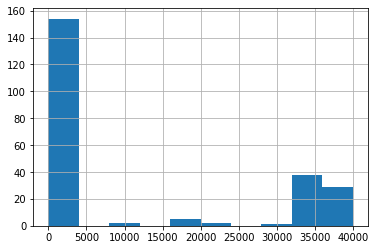

In [10]:
%matplotlib inline

# Распределение непустых данных по признакам
X.count(axis=0).hist()

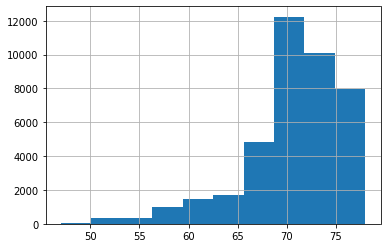

In [11]:
# Распределение непустых данных по объектам
X.count(axis=1).hist()

Выводы: в выборке нет объектов, для которых известны все признаки, в выборке приличное количество пропусков по срезам признаков. Значит, при решении задачи скорее всего нужно использовать более сложные методы обработки пропусков, чем удаление или усреднение.

Отмасштабируем числовые признаки

In [91]:
from sklearn.preprocessing import StandardScaler

data = X[real_features].to_numpy()
scaler = StandardScaler()

data_new = scaler.fit_transform(data)
X_scaled = pd.DataFrame(data_new, columns=real_features)
X_scaled[categ_features] = X[categ_features]

0

In [15]:
# В 18х признаках нет данных. Удаляем пустые признаки и обновляем списки названий числовых и категориальных признаков
drop_real_features = X_scaled[real_features].count(axis=0)[X_scaled[real_features].count(axis=0) == 0].index
drop_categ_features = X_scaled[categ_features].count(axis=0)[X_scaled[categ_features].count(axis=0) == 0].index

X_scaled.drop(columns=drop_real_features, inplace=True)
real_features = X_scaled.columns[:-40]

X_scaled.drop(columns=drop_categ_features, inplace=True)
categ_features = X_scaled.columns[real_features.shape[0]:]

In [16]:
# Добавляем столбец с метками классов в новый отмасщтабированный дф X_scaled
X_scaled['churn'] = y['churn']

## 3.1\. Корреляция вещественных признаков с целевой переменной
В качестве меры силы связи вещественных признаков и бинарной целевой переменной берем разницу математического ожидания между классами для каждого признака.

Создаем пустой дф и заполняем его результатами расчета изменением мат.ожиданий, выводим топ-20 абсолютных разниц

In [17]:
real_features_diff = X_scaled[real_features][X_scaled['churn']==1].mean(axis=0,skipna=True).to_frame(name='means_churn')
real_features_diff['means_non_churn'] = X_scaled[real_features][X_scaled['churn']==-1].mean(axis=0, skipna=True)
real_features_diff['means_diff'] = real_features_diff['means_churn'] - real_features_diff['means_non_churn']
real_features_diff['abs_means_diff'] = real_features_diff['means_diff'].abs()
real_features_diff.sort_values(by=['abs_means_diff'], ascending=False)[:20]

,means_churn,means_non_churn,means_diff,abs_means_diff
Var168,-0.529001,0.034608,-0.563608,0.563608
Var188,0.462043,-0.019631,0.481674,0.481674
Var189,-0.428533,0.035018,-0.463551,0.463551
Var131,0.376120,-0.024606,0.400726,0.400726
Var111,0.350192,-0.016912,0.367104,0.367104
Var19,0.349474,-0.015755,0.365229,0.365229
Var53,0.309044,-0.020218,0.329262,0.329262
Var177,0.291865,-0.012400,0.304265,0.304265
Var7,-0.250452,0.020950,-0.271402,0.271402
Var73,-0.245315,0.019718,-0.265033,0.265033


## 3.2\. Корреляция категориальных признаков с целевой переменной
Для расчета корреляции между категориальными признаками и бинарной целевой переменной построим таблицы сопряженности и с помощью статистики хи-квадрат рассчитаем значения коэффициента V-Крамера.

Результат запишем в словарь categ_features_phi_cramers

In [18]:
# Добавляем вспомогательный столбец с единицами для дальнейшего построения сводных таблиц (таблиц сопряженности категориальных
# признаков и бинарных меток классов)

X['ones'] = 1

In [19]:
from scipy.stats import chi2_contingency
categ_features_phi_cramers = {}

for col in categ_features:
    obs = pd.pivot_table(X[[col,'churn','ones']], values='ones', index=[col],
                     aggfunc=np.sum, columns=['churn'], fill_value=0).to_numpy()
    if obs.shape[0] <= 1:
        phi_cramers = 0
    else:
        g, p, dof, expctd = chi2_contingency(obs)
        phi_cramers = np.sqrt(g / np.sum(obs))
    categ_features_phi_cramers[col] = phi_cramers

## 4\. Визуализация данных для топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией

## 4.1\. Распределения в разрезе классов

In [21]:
# топ-20 отмасштабированных числовых переменных по силе взаимосвязи
import matplotlib.pyplot as plt
top_real = real_features_diff.sort_values(by=['abs_means_diff'], ascending=False)[:20].index.to_numpy()

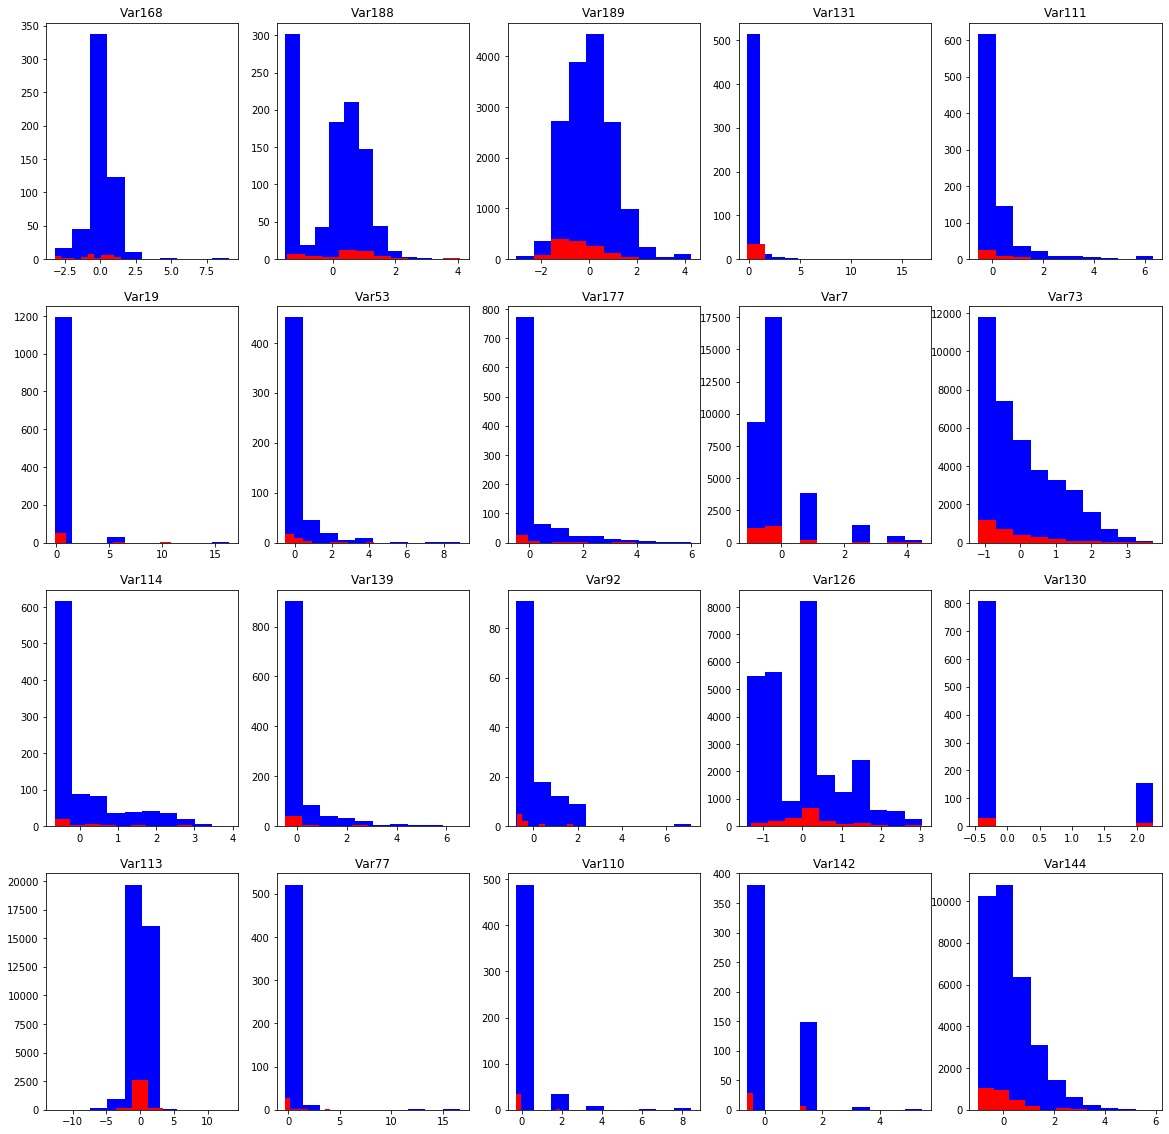

In [23]:
plt.figure(figsize=(20,20))

for plot_number, Var in enumerate(top_real):
    plt.subplot(4, 5, plot_number + 1)
    plt.hist(X_scaled[Var][X_scaled['churn']==-1], color='blue')
    plt.hist(X_scaled[Var][X_scaled['churn']==1], color='red')
    plt.title(Var)

## 4.2\. Отображение объектов в координатах пар признаков

Довольно трудоемкая процедура, результат которой также плохо-интерпретируем в ноутбуке. Для более удобного детального анализа сохраняем все визуализции в файл

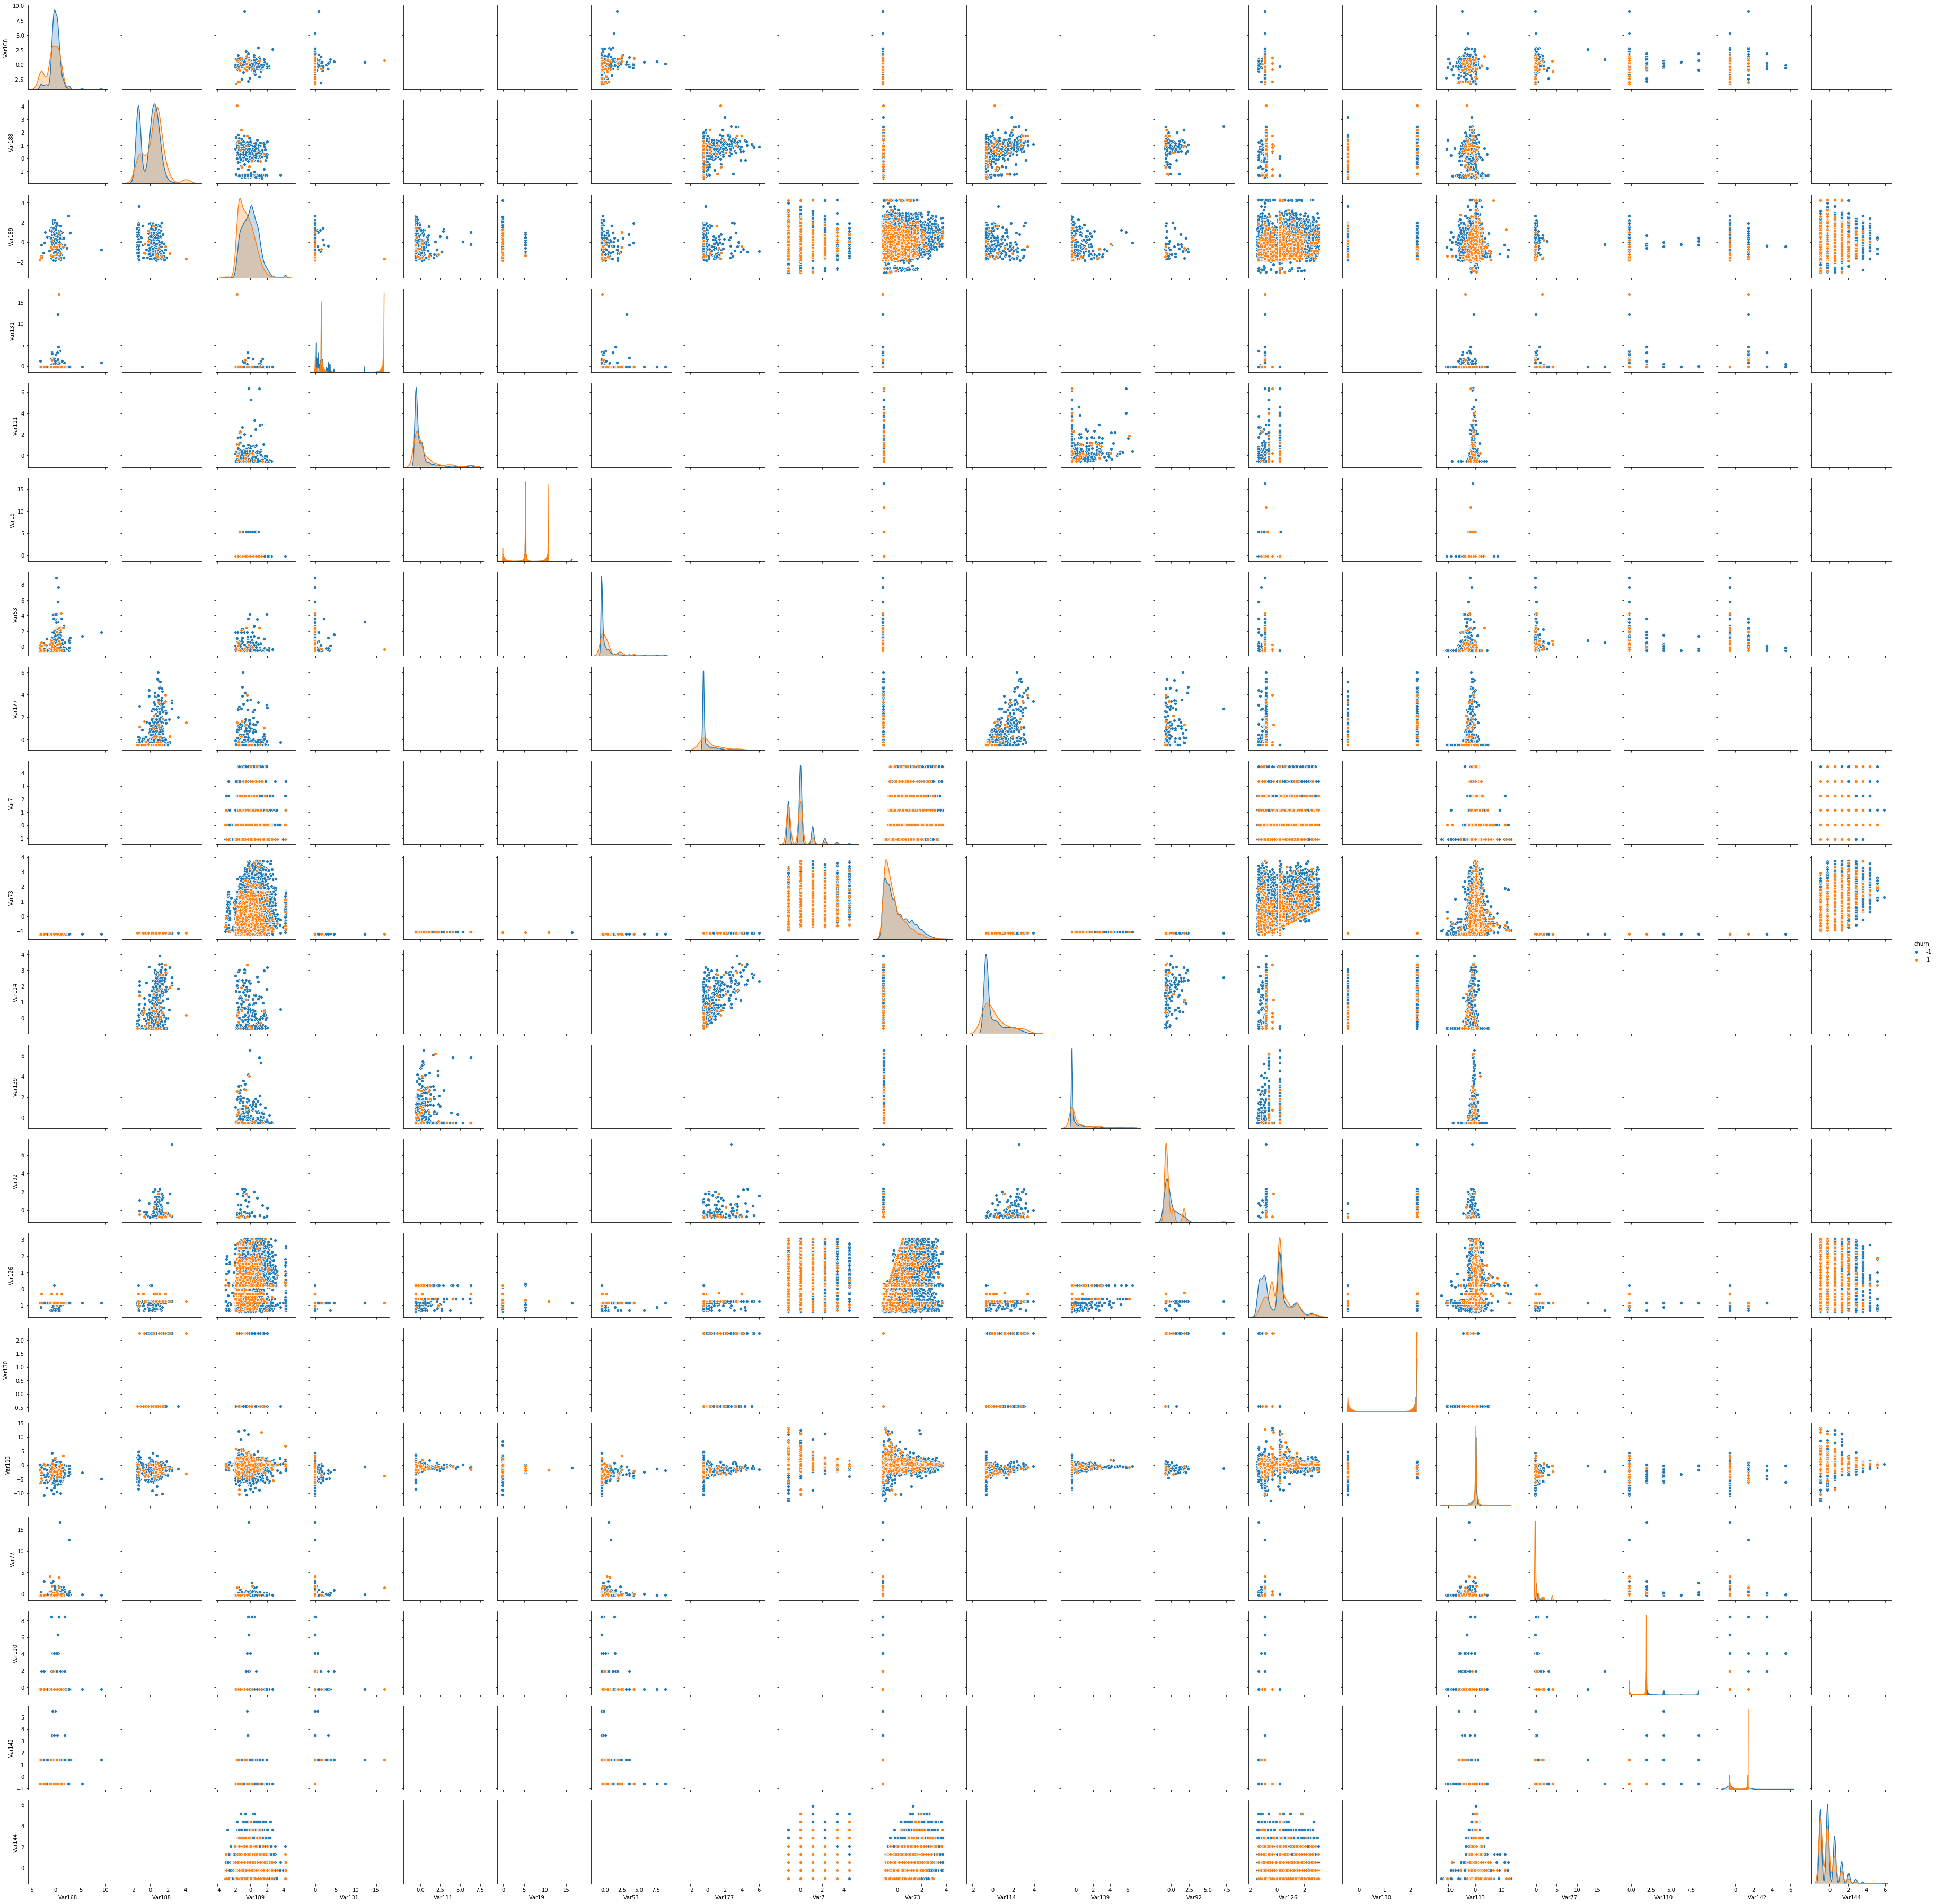

In [40]:
import seaborn
sns_plot = seaborn.pairplot(X_scaled, vars=top_real, hue="churn", diag_kind="kde")
sns_plot.savefig("pairplot_top_real.png")

## 5\. Визуализация для случайно выбранных 10 числовых признаков

## 5.1\. Распределения в разрезе классов

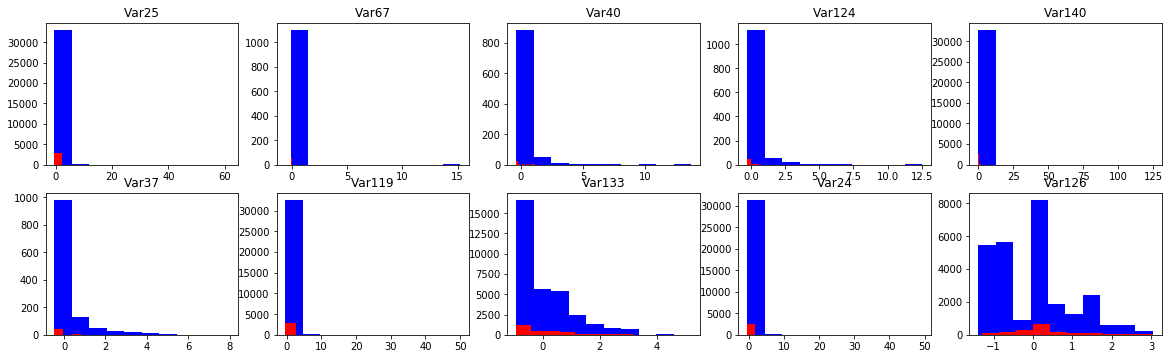

In [24]:
import random
rand_real = random.sample(set(real_features.to_numpy()), k=10)

plt.figure(figsize=(20,12))

for plot_number, Var in enumerate(rand_real):
    plt.subplot(4, 5, plot_number + 1)
    plt.hist(X_scaled[Var][X_scaled['churn']==-1], color='blue')
    plt.hist(X_scaled[Var][X_scaled['churn']==1], color='red')
    plt.title(Var)

## 5.2\. Отображение объектов в координатах пар признаков

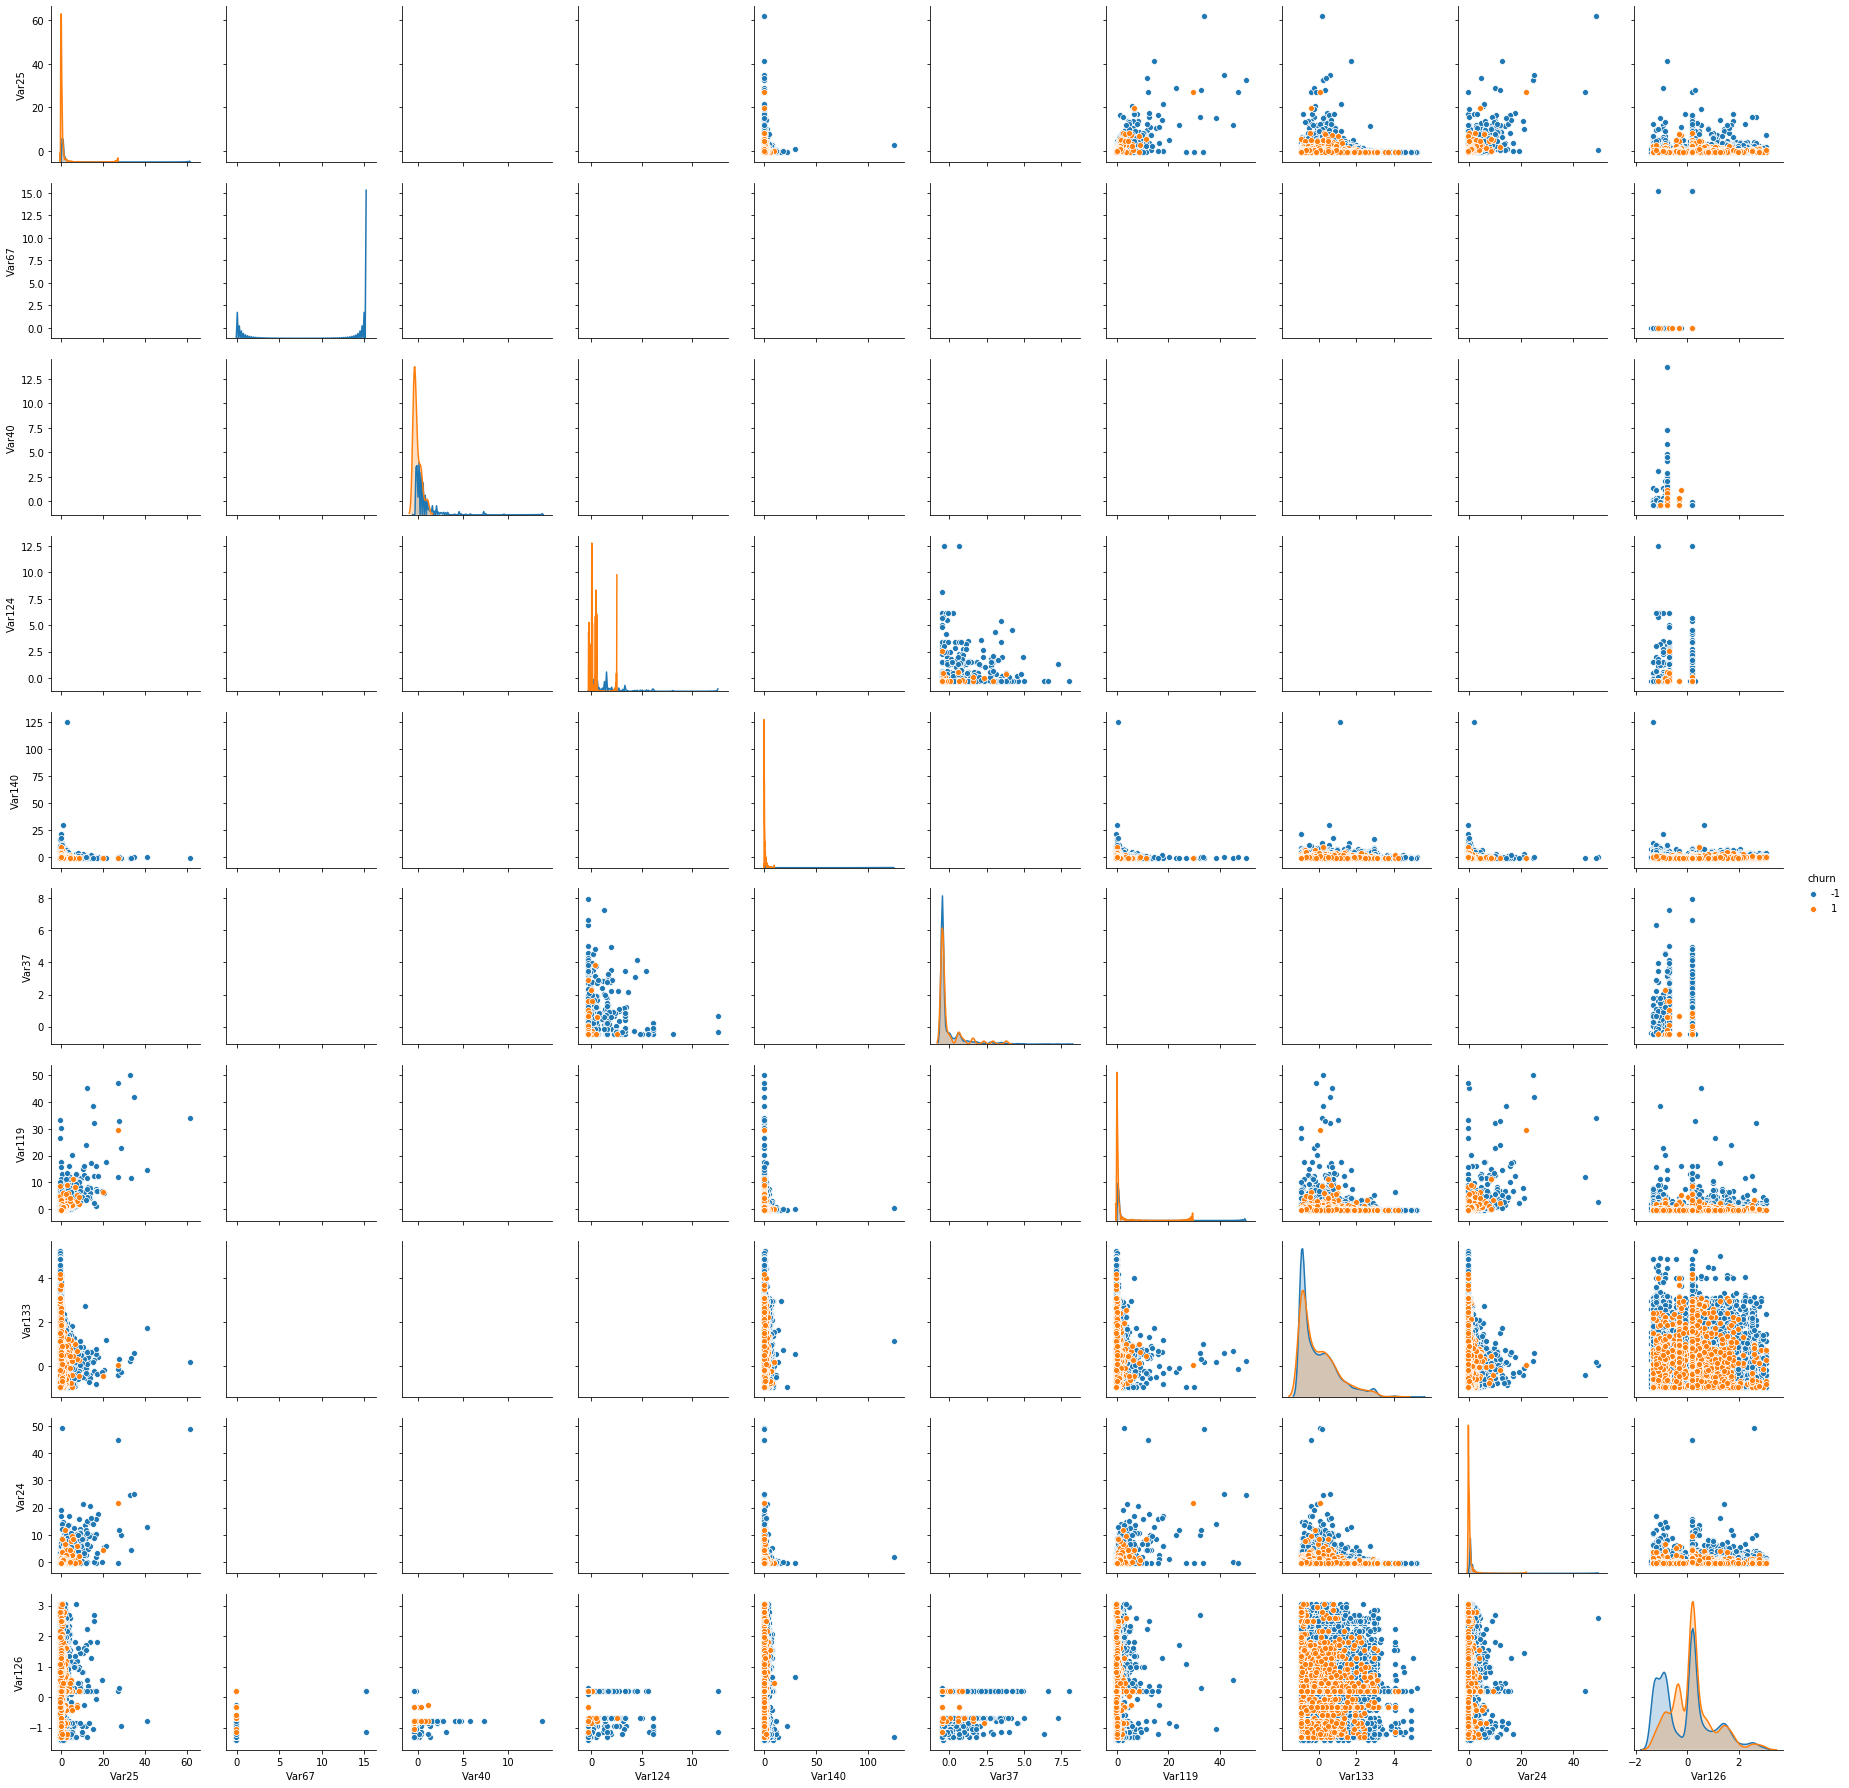

In [39]:
sns_plot = seaborn.pairplot(X_scaled, vars=rand_real, hue="churn", diag_kind="kde")
sns_plot.savefig("pairplot_random_real.png")

## 6\. Визуализация для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной

## 6.1\. Распределения в разрезе классов

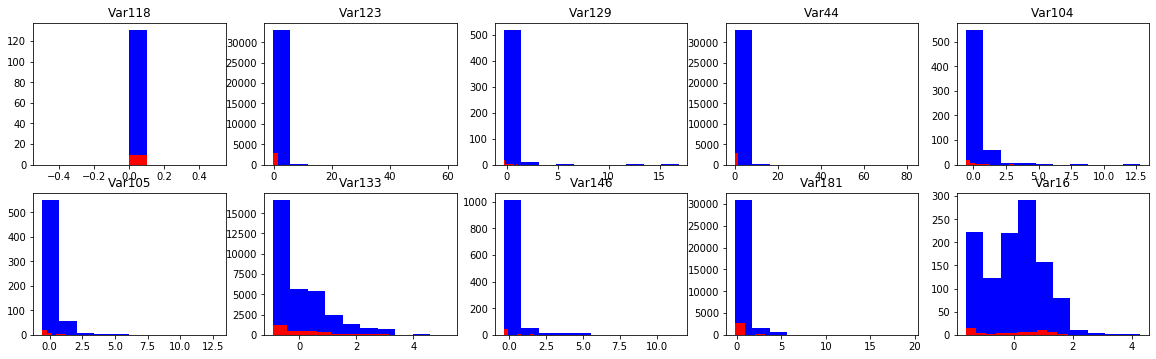

In [28]:
bottom_real = real_features_diff.sort_values(by=['abs_means_diff'], ascending=True)[:10].index.to_numpy()

plt.figure(figsize=(20,12))

for plot_number, Var in enumerate(bottom_real):
    plt.subplot(4, 5, plot_number + 1)
    plt.hist(X_scaled[Var][X_scaled['churn']==-1], color='blue')
    plt.hist(X_scaled[Var][X_scaled['churn']==1], color='red')
    plt.title(Var)

## 6.2\. Отображение объектов в координатах пар признаков

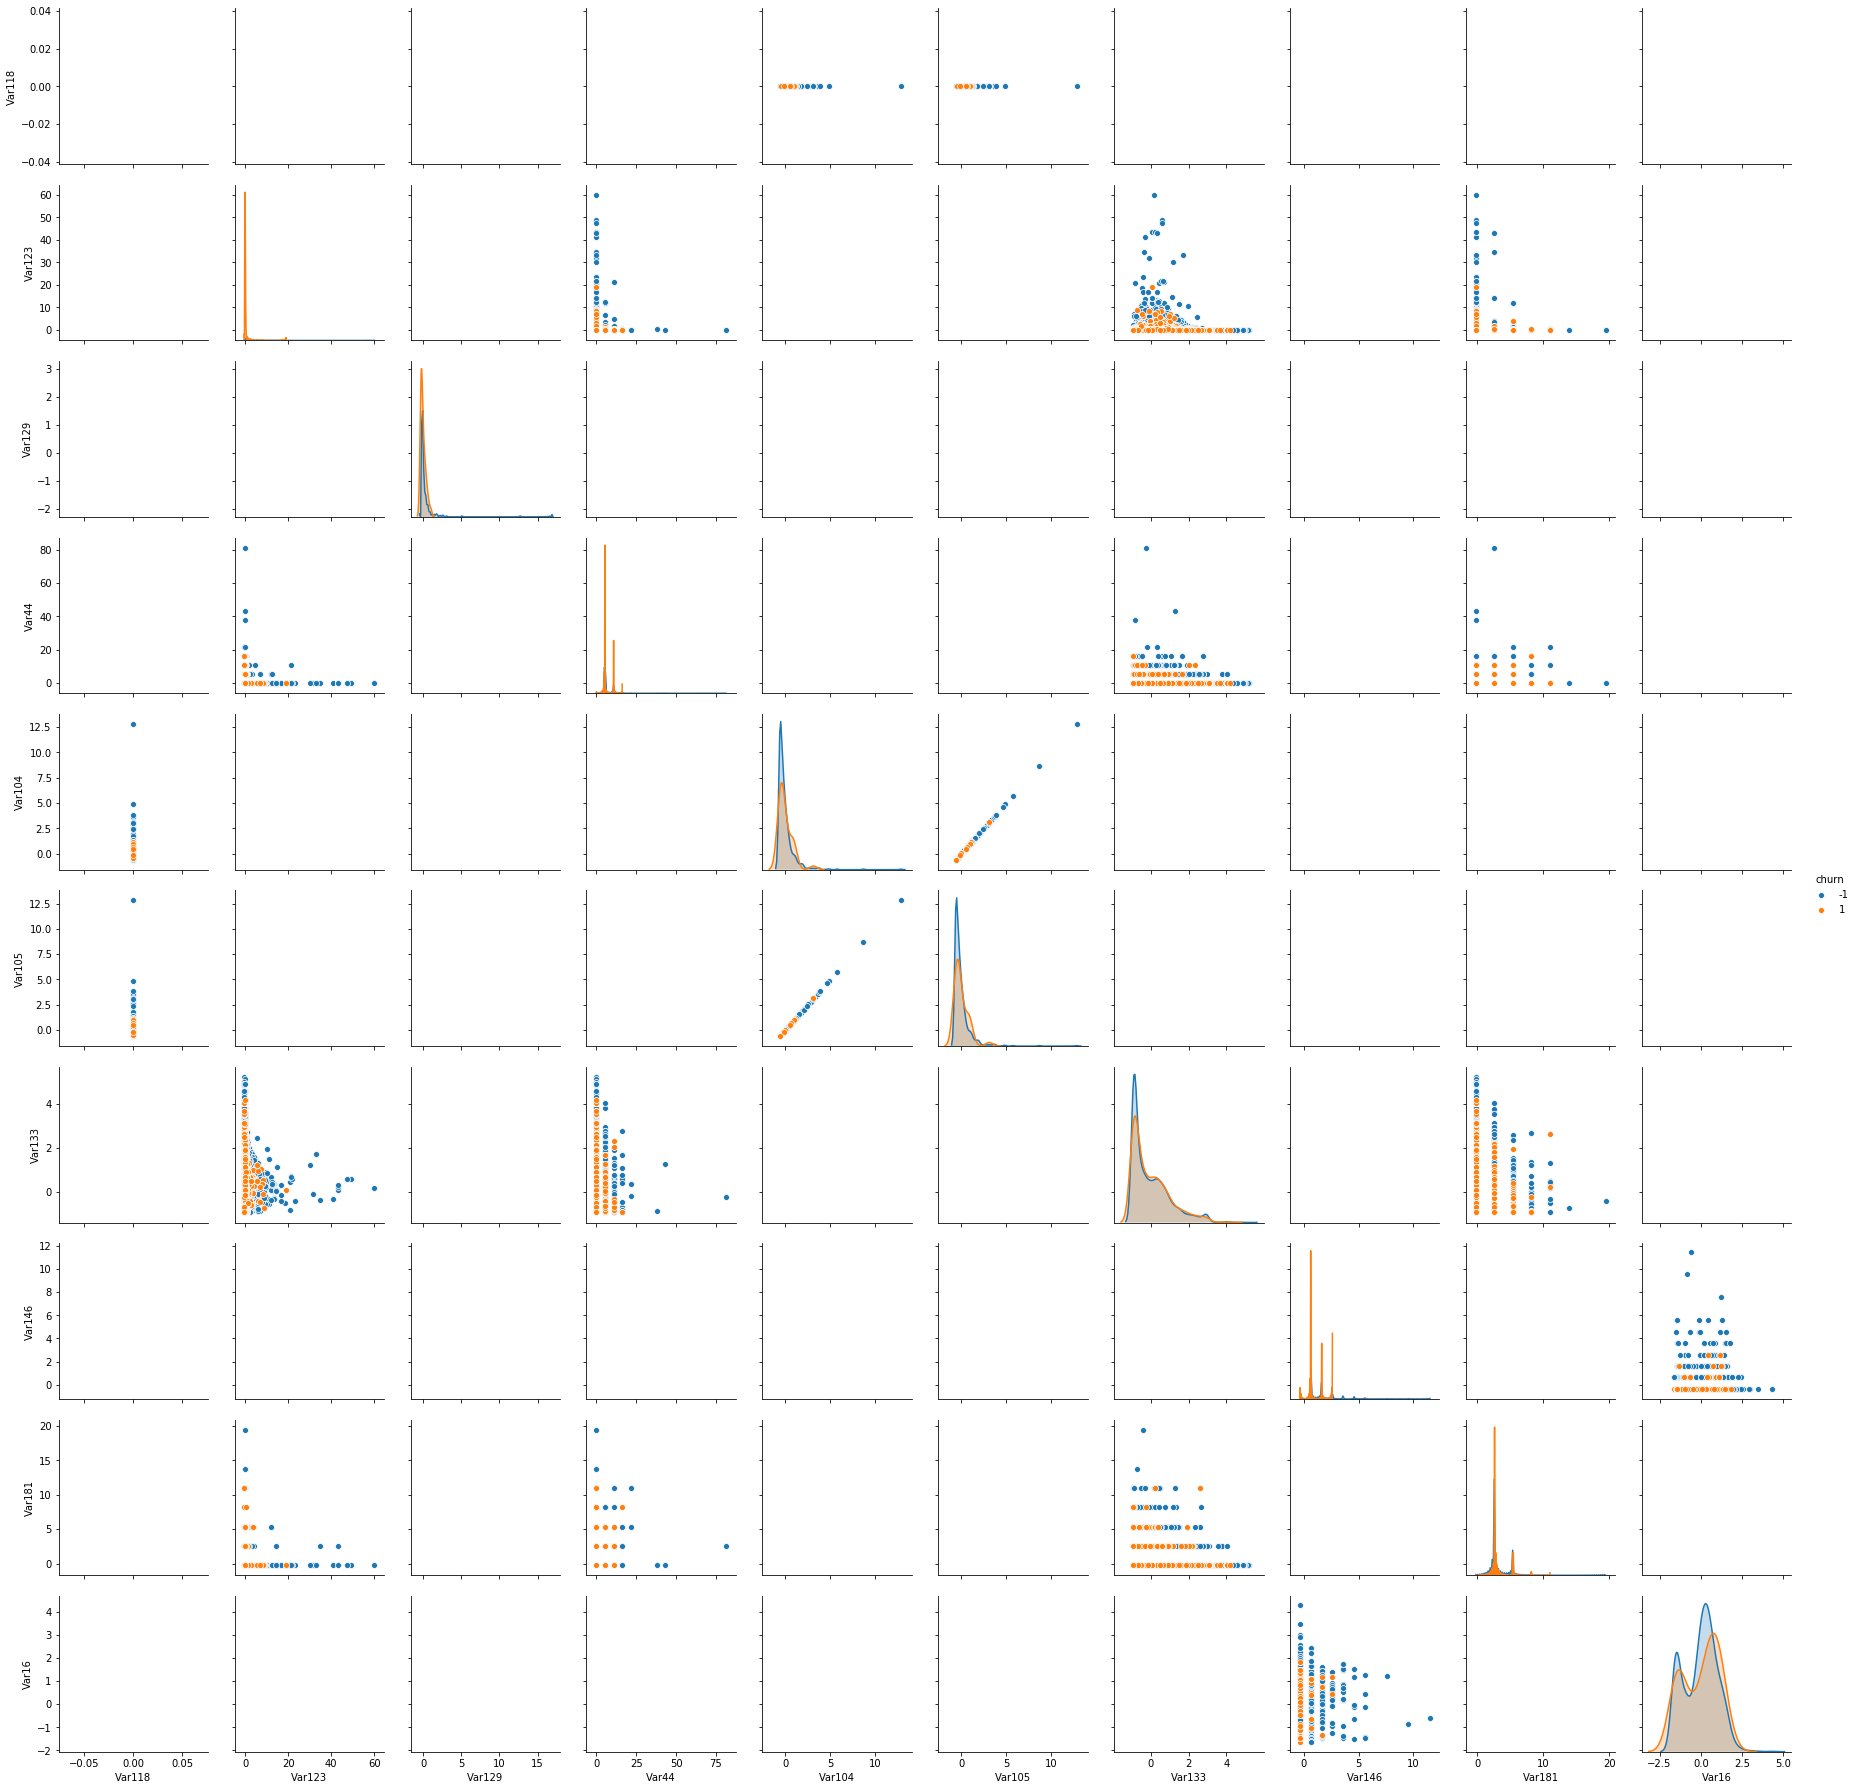

In [38]:
sns_plot = seaborn.pairplot(X_scaled, vars=bottom_real, hue="churn", diag_kind="kde")
sns_plot.savefig("pairplot_bottom_real.png")

## 7\. Анализ категориальных переменных

Заполним пустые данные в категориальных признаках специальным словом None для построения графиков

In [23]:
X_categ_features = X_scaled[categ_features].fillna(value='None', inplace=False)
X_categ_features['churn'] = X_scaled['churn']

Построение гистограмм вызвало большие временные затруднения при имеющихся рассчетных мощностях предположительно в виду большого количества значений внутри категориальных признаков. Проверим это и проанализируем количество уникальных значений категориальных признаков в разрезе классов

In [31]:
categ_unique = {}

for Var in categ_features:
    categ_unique[Var] = [X_categ_features[Var][X_categ_features['churn']==-1].unique().shape[0],
                         X_categ_features[Var][X_categ_features['churn']==1].unique().shape[0]]

In [79]:
categ_df = pd.DataFrame(data=categ_unique.values(), index=categ_features,
             columns=['non_churn', 'churn']).sort_values(by=['non_churn'], ascending=False)
categ_df['phi_cramer'] = pd.Series(categ_features_phi_cramers)
categ_df['not_na'] = X[categ_features].count()
categ_df

,non_churn,churn,phi_cramer,not_na
Var200,12730,1141,0.824051,19634
Var214,12730,1141,0.824051,19634
Var217,12065,1816,0.535147,39440
Var202,5486,1732,0.363430,39999
Var199,4073,1010,0.407841,39996
Var222,3803,1141,0.292593,40000
Var220,3803,1141,0.292593,40000
Var198,3803,1141,0.292593,40000
Var216,1772,425,0.228940,40000
Var192,342,278,0.149689,39709


### Предварительные выводы о категориальных признаках

* Категориальные признаки имеют бОльшую заполняемость, нежели вещественные. Количество уникальных значений положительно коррелируется с коэффициентом V-Крамера, рассчитанным ранее. Тем не менее есть предположение, что именно этот топовый срез представляет собой некие персонализированные данные вроде наименования компании, адрес, номер телефона, id сервиса или клиента/ Это предположение подкрепляется дисбалансом количества уникальных значений между классами (т.е. уникальные значения зависимы от количества объектов) и точечными оценками признаков из топа и середины (В топах на каждое уникальное значение приходится не более пары десятков появлений в датасете при десятках тысяч уникальных значений, в сбалансированных признаках - напротив уникальные значения более сгруппированы и имеют бОльшие частоты появлений у обоих классов)
* Тогда топовые признаки можно отнести скорее к шумовым, а уделить больше внимания срезу признаков, для которых пропорции уникальных значений находятся вблизи друг от друга

Построим и сравним гистограммы значений категориальных переменных для разных классов

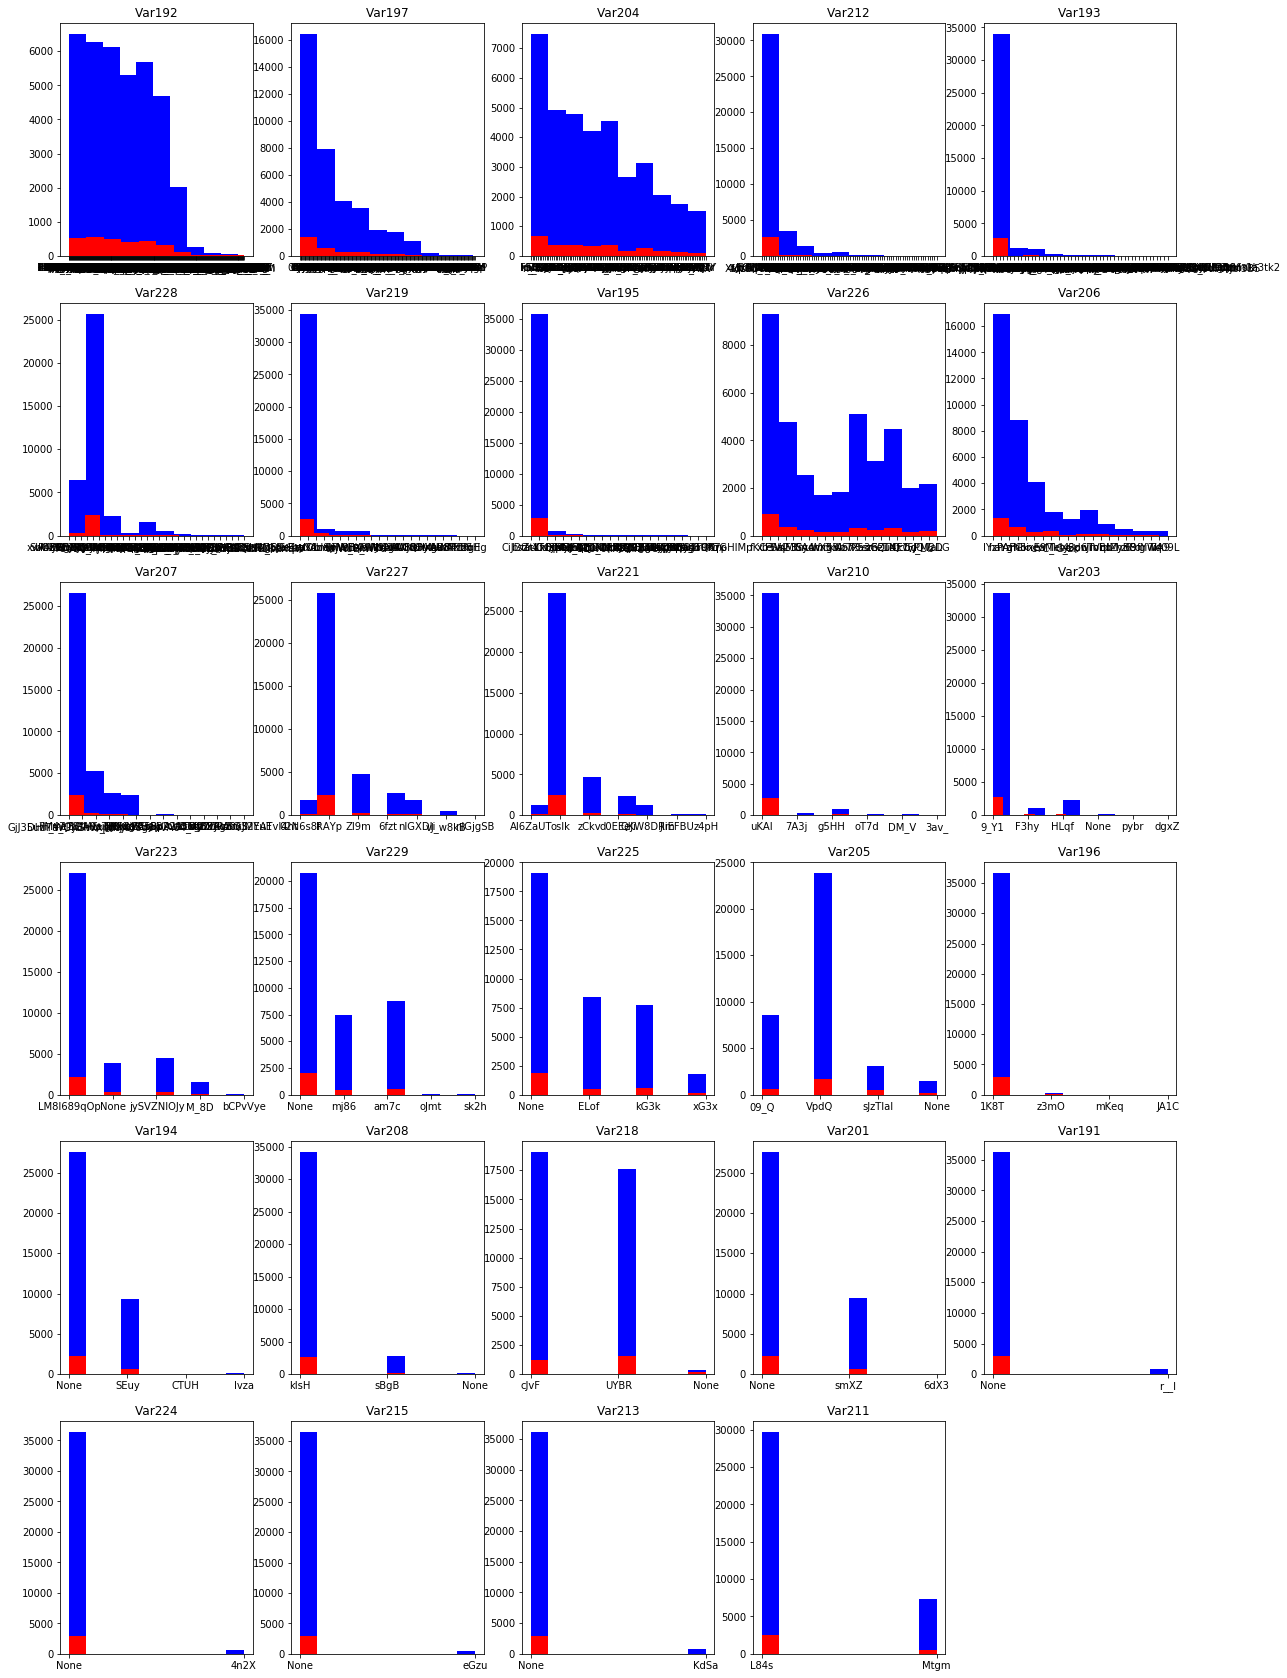

In [92]:
categ_cutted = categ_df[categ_df.non_churn <= 342].index.to_numpy()

plt.figure(figsize=(20,30))

for plot_number, Var in enumerate(categ_cutted):
    plt.subplot(6, 5, plot_number + 1)
    plt.hist(X_categ_features[Var][X_categ_features['churn']==-1], color='blue')
    plt.hist(X_categ_features[Var][X_categ_features['churn']==1], color='red')
    plt.title(Var)

Большинство распределений категориальных признаков имеет скошенный характер. Явных различий характеров распределений среди классов внутри одного признака не обнаружено.

## 8\. Выводы:

* Среди вещественных признаков из верхнего, нижнего и случайного срезов по степени связи с целевой переменной есть признаки с очень большим перекосом в сторону какого-то определенного значения (например Var131), возможно, их стоило бы прологарифмировать при решении задачи. Кроме того, есть признаки со сложной структурой гистограммы. Данные разнородны.
* В срез вещественных признаков с наименьшей разницей матожидания для разных классов попало больше признаков, имеющих структуру, схожую со структурой константных признаков
* Классы накрывают друг друга, и графики не очень информативны. Тем не менее, можно сделать первоначальные предположения, что среди вещественных признаков имеются пары, у которых облака точек разных классов хоть и частично перекрывают друг друга, но визуально различимы. Например, Var189, Var73, Var126, Var113, Var144. Для данных признаков характерно куполообразное распределение. Больше таких признаков именно в срезе топов по изменению матожидания между классами. В том же срезе присутствуют в преобладающем количестве признаки, чьи облака точек выглядят достаточно компактно.
* У большинства пар вещественных признаков визуально можно выделить объекты-выбросы.
* Замечены пары вещественных признаков, сконцентрированные либо на сторонах квадрата-графика, либо на его диагонали, то есть признаки как-то связаны. Примеры: Var189 & Var7, почти все пары с Var144 и Var130
* На основании полученных изображений и таблиц можно предположить, что наибольший вклад в модель окажут вещественные переменные. Среди категориальных скорее всего находится немалая часть шумовых.
* На этапе визуализации данных были выявлены подозрения на мультиколинеарность вещественных признаков. Однозначно стоит попробовать отбор признаков и проверить изменение качества модели.